In [119]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import datetime
import glob
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])

In [120]:
u1 = pd.read_csv(r"C:\Users\vashisth\Downloads\red_wine.csv")
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [110]:
random_state = np.random.RandomState(0)
n_sample, n_features = X.shape
X = np.c_[X, random_state.rand(n_sample, 200 * n_features)]

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [112]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [113]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
#nb_probs = nb.predict_proba(X_test)

In [114]:
rf_probs = rf_probs[:, 1]
#nb_probs = nb_probs[:, 1]

In [115]:
# calculating AUROC
#r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
#nb_auc = roc_auc_score(Y_test, nb_probs)

In [116]:
#print('Random (chance) predicition: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.4f' % (rf_auc))
#print('Navie Bayes: AUROC = %.3f' % (nb_auc))

Random Forest: AUROC = 0.8875


In [117]:
#calculate ROC curve
#r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
#nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

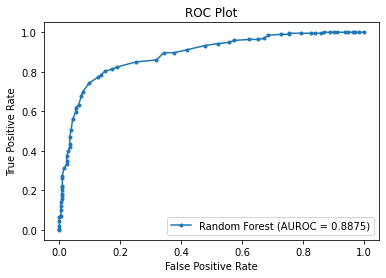

In [118]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rf_auc)

#title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend() #
# show plot
plt.show

In [68]:
u1 = pd.read_csv(r"C:\Users\vashisth\Downloads\red_wine.csv")


In [69]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [70]:
random_state = np.random.RandomState(0)
n_sample, n_features = X.shape
X = np.c_[X, random_state.rand(n_sample, 200 * n_features)]

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.10, random_state=0)

In [72]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [73]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)


In [98]:
rf_probs = rf_probs[:, 1]

(200,)

In [75]:
rf_auc = roc_auc_score(Y_test, rf_probs)

In [76]:
print('Random Forest: AUROC = %.4f' % (rf_auc))

Random Forest: AUROC = 0.8928


In [77]:
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

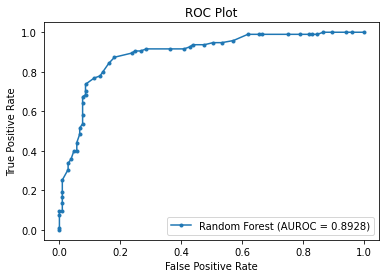

In [78]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rf_auc)

#title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend() #
# show plot
plt.show

In [79]:
u1 = pd.read_csv(r"C:\Users\vashisth\Downloads\red_wine.csv")

In [80]:
df = pd.DataFrame

In [81]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')

 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [82]:
model.fit(X_train,Y_train)
pred_values = model.predict(X_test)


In [83]:
#print('accuracy of each fold - {}'.format(acc_score))
#print('Avg accuracy : {}'.format(avg_acc_score))
#print('LR: AUROC = %.3f' % (model_auc))

In [84]:
acc = accuracy_score(pred_values , Y_test)
acc_score.append(acc)

In [85]:
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.98]
Avg accuracy : 0.098


In [102]:

rp = [0 for _ in range(len(Y_test))]
rfp = model.predict_proba(X_test)
rfp = rfp[:, 1]
m_fpr, m_tpr, _ = roc_curve(Y_test, rfp)
r_auc = roc_auc_score(Y_test, rp)
rf_auc = roc_auc_score(Y_test, rfp)

<function matplotlib.pyplot.show(close=None, block=None)>

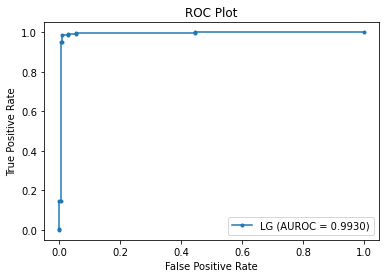

In [103]:
plt.plot(m_fpr, m_tpr, marker='.', label='LG (AUROC = %0.4f)' % rf_auc)
#plt.plot(acc, marker='.', label='LG (acc = %0.2f)' % acc)

#title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend() #
# show plot
plt.show

In [105]:
print ('LG: %.3f' % rf_auc)

LG: 0.993


In [106]:
print('LG %.3f' % acc)

LG 0.980


In [429]:
u1 = pd.read_csv(r"C:\Users\vashisth\Downloads\red_wine.csv")

In [457]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_pred=LR.predict(X_test)

In [458]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.98


In [452]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = LR.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
print('Random (chance) Prediction: AUROC = %.4f' % (r_auc))
print('LogisticRegrission: AUROC = %.4f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.5000
LogisticRegrission: AUROC = 0.9930


In [453]:
LR_fpr, LR_tpr, _ = roc_curve(Y_test, rf_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

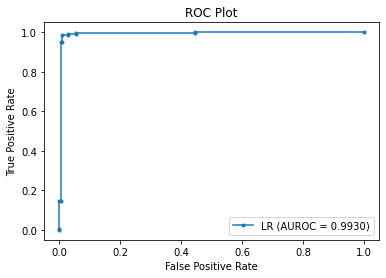

In [454]:
plt.plot(LR_fpr, LR_tpr, marker='.', label='LR (AUROC = %0.4f)' % rf_auc)
#plt.plot(acc, marker='.', label='LG (acc = %0.2f)' % acc)

#title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend() #
# show plot
plt.show

In [449]:
RFC = RandomForestClassifier()
fit_RFC = RFC.fit(X_train,Y_train)
RFC_score = RFC.score(X_test,Y_test)
print('Accuracy : ',RFC_score)

Accuracy :  0.975


In [445]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = RFC.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
print('Random (chance) Prediction: AUROC = %.4f' % (r_auc))
print('Random Forest Classifier: AUROC = %.4f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.5000
Random Forest Classifier: AUROC = 0.9907


In [446]:
RFC_fpr, RFC_tpr, _ = roc_curve(Y_test, rf_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

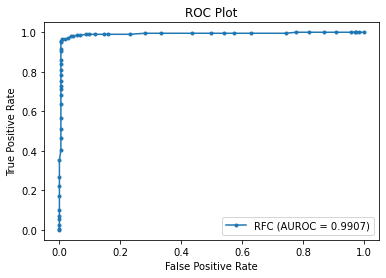

In [447]:
plt.plot(RFC_fpr, RFC_tpr, marker='.', label='RFC (AUROC = %0.4f)' % rf_auc)
#plt.plot(acc, marker='.', label='LG (acc = %0.2f)' % acc)

#title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend() #
# show plot
plt.show

In [430]:
#from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,Y_train)
y_pred = GNB.predict(X_test)

In [431]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9725


In [432]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = GNB.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
print('Random (chance) Prediction: AUROC = %.4f' % (r_auc))
print('NB: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.5000
NB: AUROC = 0.992


In [433]:
GNB_fpr, GNB_tpr, _ = roc_curve(Y_test, rf_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

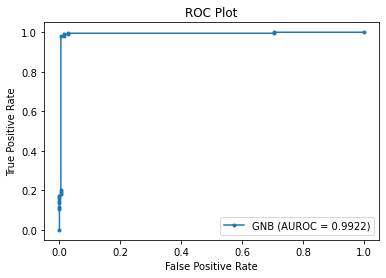

In [434]:
plt.plot(GNB_fpr, GNB_tpr, marker='.', label='GNB (AUROC = %0.4f)' % rf_auc)
#plt.plot(acc, marker='.', label='LG (acc = %0.2f)' % acc)

#title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend() #
# show plot
plt.show

In [414]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT = DT.fit(X_train,Y_train)
y_pred = DT.predict(X_test)

In [415]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9725


In [416]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = DT.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
print('Random (chance) Prediction: AUROC = %.4f' % (r_auc))
print('DT: AUROC = %.4f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.5000
DT: AUROC = 0.9726


In [417]:
DT_fpr, DT_tpr, _ = roc_curve(Y_test, rf_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

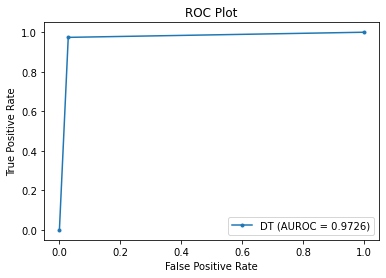

In [418]:
plt.plot(DT_fpr, DT_tpr, marker='.', label='DT (AUROC = %0.4f)' % rf_auc)
#plt.plot(acc, marker='.', label='LG (acc = %0.2f)' % acc)

#title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend() #
# show plot
plt.show

In [419]:
from sklearn import svm
SV = svm.SVC(kernel='linear',probability=True) 
SV.fit(X_train,Y_train)
y_pred = SV.predict(X_test)

In [420]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9725


In [421]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = SV.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
print('Random (chance) Prediction: AUROC = %.4f' % (r_auc))
print('SVM: AUROC = %.4f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.5000
SVM: AUROC = 0.9912


In [422]:
SV_fpr, SV_tpr, _ = roc_curve(Y_test, rf_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

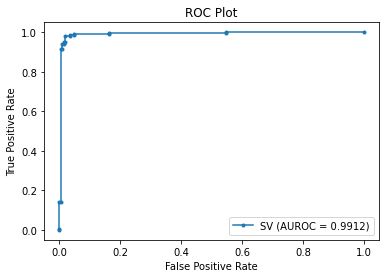

In [423]:
plt.plot(SV_fpr, SV_tpr, marker='.', label='SV (AUROC = %0.4f)' % rf_auc)
#plt.plot(acc, marker='.', label='LG (acc = %0.2f)' % acc)

#title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show Legend
plt.legend() #
# show plot
plt.show

In [460]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train,Y_train)
dummy_classifier.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [425]:
dummy_classifier.score(X_test, Y_test)

0.4825

In [426]:
Dummy_Classifier = DummyClassifier(strategy= "uniform")
Dummy_Classifier.fit(X_train,Y_train)
Dummy_Classifier.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [427]:
Dummy_Classifier.score(X_test, Y_test)

0.52